<a href="https://colab.research.google.com/github/sysphcd/PythonProgrammingforData/blob/main/11_Page_Views_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovery project - page views

### Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

For this project you will visualise data that has values recorded against time.  You will use Pandas and Matplotlib to visualise the dataset which contains the number of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. You will create a line chart, a bar chart, and some box plots to create visualisations that will help you understand the patterns in visits to the forum and identify growth over various time ranges (yearly, monthly, etc).


The dataset can be read from here: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"

Visualise and analyse the data in the following ways:



In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Data retrieval from a csv file from githut
def get_data(url):
  df = pd.read_csv(url)
  print(df.info())
  return df

# Sort and clean data
def clean_data(original_df):
  # sort dataframe by date
  original_df = original_df.sort_values(by = 'date', ascending = True)

  # check if any null values
  # print(original_df.isnull().values.any())
  # print(original_df["value"].isnull().values.any())
  # print(original_df[~original_df["value"].isnull()])
  original_df = original_df.dropna()

  # Drop duplicates rows
  original_df = original_df.drop_duplicates()

  # print(original_df['date'].iloc[0])
  return original_df
  
# Programs starts here
url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
original_df = get_data(url)   # Data retriveal
print(original_df)
cleaned_df = clean_data(original_df)   # sort and clean data
# print(cleaned_df)
# The code below will run and test your code to see if you have returned a series with the correct length and first row
actual = clean_data(original_df).index[0]
expected = 0

if actual == expected and len(clean_data(original_df)) == 1304:
  print("Test passed", actual)
else:
  print("Test failed","Should have got", expected, "got", actual, "and length of series should have been 1304 but was", len(clean_data(original_df)))

cleaned_df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB
None
            date   value
0     2016-05-09    1201
1     2016-05-10    2329
2     2016-05-11    1716
3     2016-05-12   10539
4     2016-05-13    6933
...          ...     ...
1299  2019-11-29  171584
1300  2019-11-30  141161
1301  2019-12-01  142918
1302  2019-12-02  220144
1303  2019-12-03  158549

[1304 rows x 2 columns]
Test passed 0


,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


### 1.  a line plot, similar to this 
---
![example](https://drive.google.com/uc?id=1Cic5SybYEc86rqbwTCZzyEf4rzQNWJLP) (taken from the freeCodeCamp site) and with similar labelling.

To prepare the data for the line plot you might do the following:  

*  convert the `date` column to **datetime** type 
*  create 3 new columns for `year`, `month` and `day` (use `dt.year, dt.strftime to get the month name, dt.day`)
*  set the index to the **date** column.
*  clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


,value,year,month,day
date,,,,
2016-05-19,19736,2016,05,19
2016-05-26,18060,2016,05,26
2016-05-27,19997,2016,05,27
2016-05-28,19044,2016,05,28
2016-05-29,20325,2016,05,29
...,...,...,...,...
2019-11-24,138875,2019,11,24
2019-11-29,171584,2019,11,29
2019-11-30,141161,2019,11,30


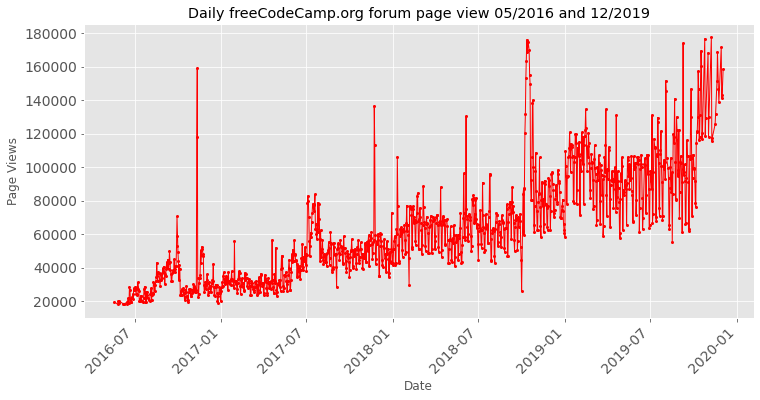

In [49]:
from pandas.core.algorithms import quantile
from datetime import datetime
def generate_lineplot(df):

  # convert the date column to datetime type
  copy_df = df
  copy_df['date'] = pd.to_datetime(copy_df.date)
  copy_df.date
  # create 3 new columns for year , month and day
  copy_df['year'] = copy_df.date.dt.year  #pd.DatetimeIndex(df['date']).year
  copy_df['month'] = copy_df.date.dt.strftime("%m") #pd.DatetimeIndex(df['date']).month
  copy_df['day'] = copy_df.date.dt.day #pd.DatetimeIndex(df['date']).day

  
  # set index to the date column
  copy_df = copy_df.set_index('date') #,inplace=True)
  
  copy_df
  # filter out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
  top = copy_df['value'].quantile(0.975)
  bottom = copy_df['value'].quantile(0.025)
  # remove outliers
  filtered_df = copy_df[(copy_df['value'] <= top) & (copy_df['value'] >= bottom)]   
  display(filtered_df)
  
  # Line Plot using 'plot' function on dataframe
  data = filtered_df['value'] #copy_df.groupby(['year','month'])["value"].mean()
  labels = data.keys()
  # plt.title("Daily freeCodeCamp.org forum page view 05/2016 and 12/2019")
  filtered_df['value'].plot(kind='line', figsize=(12, 6), title='Daily freeCodeCamp.org forum page view 05/2016 and 12/2019', fontsize=14, color='red', linewidth=1, marker='o', markersize=2);
  # plt.plot(labels, data, color='red') 
  # plt.rcParams['figure.figsize'] = (12, 5)
  plt.xticks(rotation=45)
  plt.xlabel('Date')
  plt.ylabel('Page Views')
  # plt.grid()
  plt.show()
  return filtered_df

final_df = generate_lineplot(cleaned_df)

###2. a bar chart similar to this 
---

![example](https://drive.google.com/uc?id=15-tIwheaCIcUsx6jfg5DBAWFVGE4bHzK) (taken from the freeCodeCamp site) and with similar labelling.  It should show average daily page views for each month grouped by year. 

To prepare the data for the bar chart you should create a pivot table and can use pivot_table_name.plot(kind='bar')


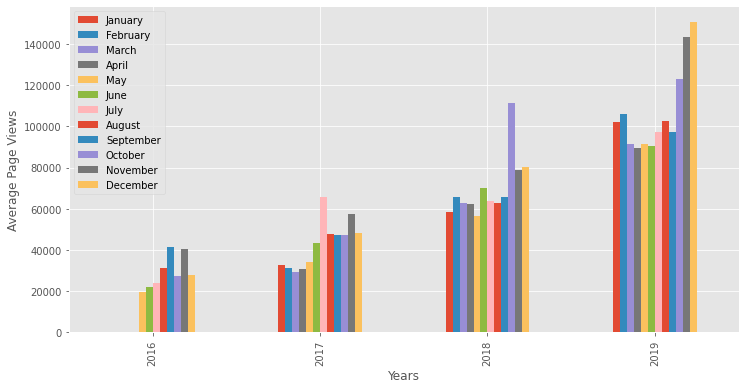

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))
df_pivot = final_df.pivot_table(index=final_df.index.year, columns=final_df.index.month, values='value', aggfunc='mean')
df_pivot.plot(kind='bar', ax=ax)
plt.xlabel('Years')
plt.ylabel('Average Page Views')
ax.legend(
    ['January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November','December']);
plt.show()


In [ ]:

# def generate_barplot(df):
#   copy_df = df
#   display(copy_df)
#   # groupby_df = copy_df.groupby(['year','month'])["value"].mean()
#   #display(groupby_df)
#   # pt = pd.pivot(data=groupby_df, columns=['year','month'])
#   #pd.pivot(df, index=["year", "month"], columns="value", values="value")

#   pt = pd.pivot_table(copy_df,
#                index=["year"],
#                columns="month",
#                values=['value'],
#                aggfunc='mean')
  
#   fig, ax = plt.subplots(figsize=(12, 6))
#   print(type(fig))
#   print(type(ax))
#   # df_pivot = df.pivot_table(index=df.index.year, columns=df.index.month, values='page_views', aggfunc='mean')
#   # df_pivot.plot(kind='bar', ax=ax)
#   #ax = df.plot(kind='bar') # "same" as above
#   pt['value'].plot(kind='bar', ax=ax)
#   ax.legend(
#     ['January', 'February', 'March', 'April', 'May', 'June', 
#     'July', 'August', 'September', 'October', 'November','December']);

#   plt.show()


# generate_barplot(cleaned_df)

###3.  a set of box plots similar to this
---
 ![example](https://drive.google.com/uc?id=1kqhGKnA0Ybtyw2cew67u3_ogMS9Fb1hM)

These box plots should show how the values are distributed within a given year or month and how it compares over time. 


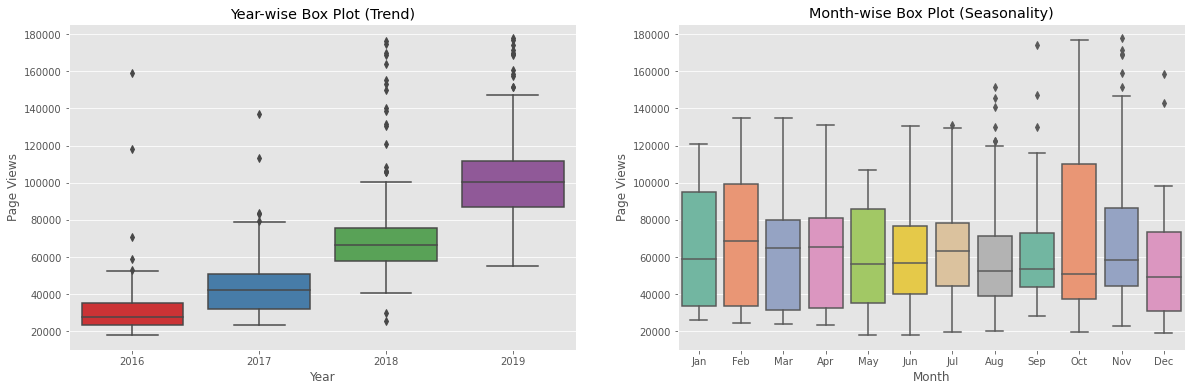

In [52]:
# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

#create seaborn boxplots by group
#A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.
#https://seaborn.pydata.org/generated/seaborn.boxplot.html

# setting the dimensions of the plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# sort the rows by date
final_df.sort_values(by=["month"], inplace=True)
# display(final_df)
# create a support series with the name of the month of each row
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
months = final_df["month"].apply(lambda month: month_names[int(month)-1])

# drawing the plot
color_palette1 = "Set1"
color_palette2 = "Set2"
# sns.boxplot(x='year', y='value', data=final_df, showfliers=True,flierprops = dict(markerfacecolor = '0.99', markersize = 1), palette=color_palette).set(title='Year-wise Box Plot (Trend)')
sns.boxplot(x='year', y='value', data=final_df, orient='v', ax=axes[0], palette=color_palette1).set(title='Year-wise Box Plot (Trend)', xlabel='Year',ylabel='Page Views')
# sns.boxplot(x='month', y='value', data=final_df, orient='v', ax=axes[1], palette=color_palette2).set(title='Month-wise Box Plot (Seasonality)', xlabel='Month',ylabel='Page Views')
sns.boxplot(x=months, y='value', data=final_df, orient='v', ax=axes[1], palette=color_palette2).set(title='Month-wise Box Plot (Seasonality)', xlabel='Month',ylabel='Page Views')
plt.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


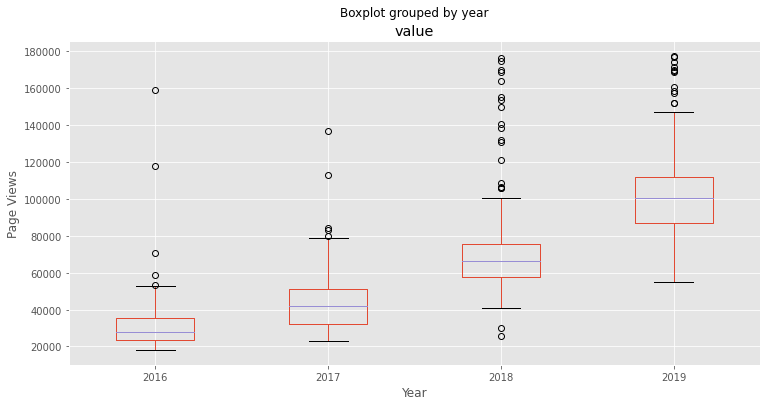

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


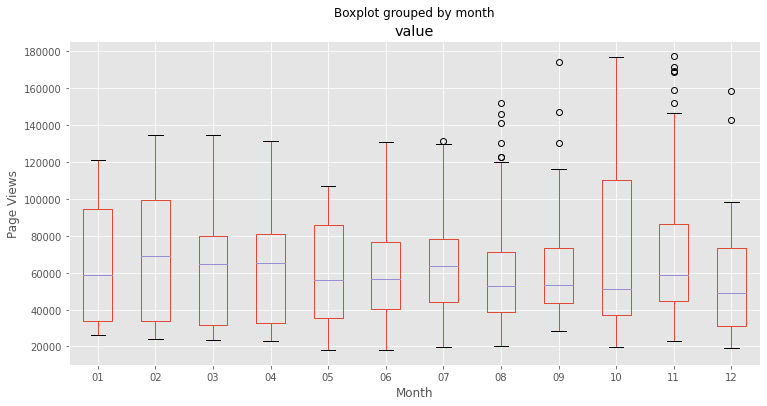

In [81]:
boxplot_year = final_df.boxplot(column='value',by='year',figsize= (12,6)) # column: Column to plot, by: Column to split upon
# ax1.set_title('Year-wise Box Plot (Trend)')

plt.xlabel('Year')
plt.ylabel('Page Views')
plt.show()

boxplot_month = final_df.boxplot(column='value',by='month',figsize= (12,6),grid=True)
# ax2.set_title('Month-wise Box Plot (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Page Views')
plt.show()
# fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharey=False)
# final_df.boxplot(column=['Price'],by="date",ax=axes)


# fig, axs = plt.subplots(figsize=(8, 6))
# df_month = final_df.pivot_table(index=final_df.index.year, columns=final_df.index.month, values='value', aggfunc='mean')
# df_month.plot(kind='box', ax=axs, by=['year', 'month'], grid=True, layout=(1,2))
# # boxplot = df.boxplot(column=['Col1', 'Col2'], by='X',layout=(2, 1))
# plt.xlabel('Month')
# plt.ylabel('Page Views')
# plt.title('Month-wise Box Plot(Seasonality')
# plt.show()
# green_diamond = dict(markerfacecolor='g', marker='D')
# fig3, ax3 = plt.subplots()
# ax3.set_title('Changed Outlier Symbols')
# ax3.boxplot(data, flierprops=green_diamond)

###4.  predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


Linear regression using linregress
parameters: slope=24385.52 intercept=-49137675.66 
regression: a=0.79 b=0.00, std error= 532.383




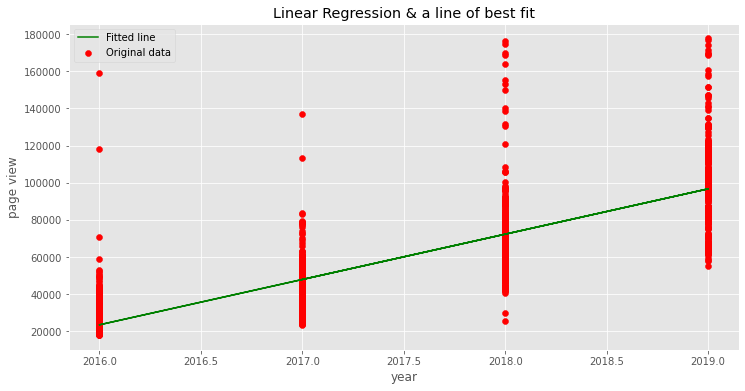

In [82]:
from scipy.stats import linregress
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# ------------------------Perform a linear regression and create a line of best fit---------------------------------
#https://stackoverflow.com/questions/61205263/how-can-i-extend-a-linear-regression-line-and-predict-the-future

# display(final_df)
# df_month = final_df.pivot_table(index=final_df.index.year, columns=final_df.index.month, values='value', aggfunc='mean')
# display(df_month)

x = final_df['year']
y = final_df['value']
# Linear regression using stats.linregress
# slope, intercept, r_value, p_value, stderr = linregress(value_2018, value_2019)
# print(slope, intercept, r_value, p_value, stderr)

# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, r_value, p_value, stderr) = linregress(x, y)
print('Linear regression using linregress')
print('parameters: slope=%.2f intercept=%.2f \nregression: a=%.2f b=%.2f, std error= %.3f' % (slope, intercept, r_value, p_value, stderr))
print('\n')

# Plot data points
plt.figure(figsize=(12, 6)) 
plt.scatter(x, y, color="red", marker="o", label="Original data")

# matplotlib ploting
plt.title('Linear Regression & a line of best fit')
# plt.plot(t, xr, 'r.-')
# plt.legend(['original','plus noise', 'regression'])


# Plot linear regression line.
y_pred = intercept + slope * x #value
plt.plot(x, y_pred, color="green", label="Fitted line")
    #value_2018,y_pred, color="green", label="Fitted line")
# linear_regressor = LinearRegression()  # create object for the class
# linear_regressor.fit(X, Y)  # perform linear regression
# Y_pred = linear_regressor.predict(X)  # make predictions

# Set labels
plt.legend(loc='best')
plt.xlabel('year') 
plt.ylabel('page view')
plt.show()


24385.517299879688 -49137675.6311785


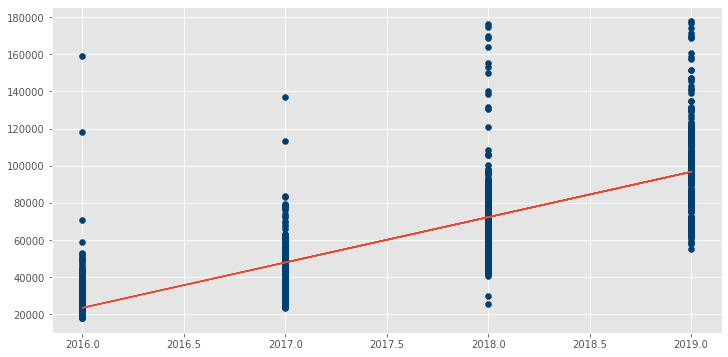

In [83]:
# ----------------------Method 2 for perform a linear regression and create a line of best fit----------------------
xs = final_df['year']
ys = final_df['value']

# the calculation for the best-fit line's y-intercept is:
# b = mean(ys) - (m*mean(xs)), and return m and b:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b


m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

regression_line = [(m*x)+b for x in xs]

style.use('ggplot')
plt.figure(figsize=(12, 6))
plt.scatter(xs, ys, color='#003F72')
plt.plot(xs, regression_line)
plt.show()

Linear regression using linregress
parameters: slope=24385.52 intercept=-49137675.66 
regression: a=0.79 b=0.00, std error= 532.383




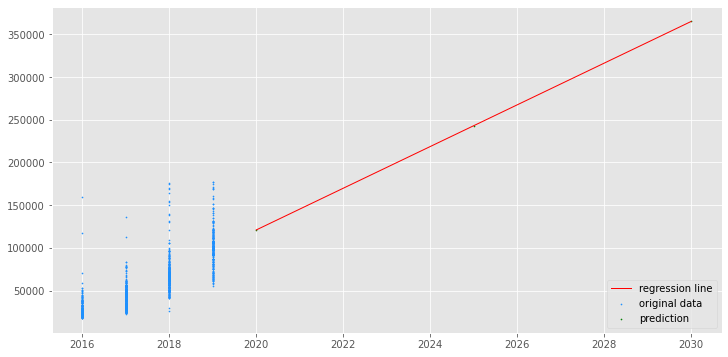

In [87]:
# predict the page views in the year 2020, 2025 and 2030 if identified trends persist.
# define a new set of x-values for predictions
# https://pythonprogramming.net/how-to-program-best-fit-line-machine-learning-tutorial/
# predict_x = 7
# predict_y = (m*predict_x)+b
years_predict = np.arange(2020, 2035, 5)
predict_2020 = (slope*2020)+intercept
predict_2025 = (slope*2025)+intercept
predict_2030 = (slope*2030)+intercept
value_predict = [predict_2020, predict_2025, predict_2030]

y = final_df['value'] #pd.Series(value) 
x = final_df['year']#pd.Series(year)

# slope, intercept, r_value, p_value, std_err = linregress(x, y)
# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, r_value, p_value, stderr) = linregress(x, y)
print('Linear regression using linregress')
print('parameters: slope=%.2f intercept=%.2f \nregression: a=%.2f b=%.2f, std error= %.3f' % (slope, intercept, r_value, p_value, stderr))
print('\n')

line = [slope * xi + intercept for xi in years_predict]

plt.figure(figsize=(12, 6))
plt.scatter(x, y, s = 5, marker = '.', label='original data', color = 'dodgerblue')
plt.scatter(years_predict, value_predict, s = 5, marker = '.', label='prediction', color = 'green')
plt.plot(years_predict, line, color = 'red', label="regression line", linewidth=1)
plt.legend(loc=4)
plt.xticks(range(2016, 2032, 2))
plt.show()

# Reflect

What caused the biggest problems?

If it's wrong dataframe, it will cause different result. 




How did you solve these problems?

Break problems to small pieces. 
Search for the documents and asked teams. 